# Huyendo de la ciudad

## Sevilla y sus pueblos

### Importamos librerias necesarias

In [73]:
import pandas as pd
import re
import plotly.graph_objs as go
from plotly.offline import iplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import subplots
import plotly.express as px

### Importamos los archivos(fuente:[www.ine.es](https://www.ine.es/index.htm))

In [74]:
Poblacion_provincias = pd.read_csv('data/Poblacion_por_capitales_de_provincias.csv',sep='\t',encoding='latin1')

### Información basica

In [75]:
Poblacion_provincias.head()

,Pob_Cap,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,02003 Albacete,172722,174336,173329,173050,172816,172426,172121,172487,172693,...,170475,169716,166909,164771,161508,159518,156466,155142,152155,149507
1,03014 Alicante/Alacant,337304,337482,334887,331577,329988,330525,328648,332067,335052,...,334418,334757,331750,322673,322431,319380,310330,305911,293629,283243
2,04013 Almería,200753,201322,198533,196851,195389,194515,194203,193351,192697,...,190013,188810,187521,186651,185309,181702,177681,176727,173338,170994
3,05019 Ávila,57949,58369,57744,57657,58149,58083,58358,58933,59258,...,58245,56855,56144,53794,53272,52612,52417,52078,50241,47967
4,06015 Badajoz,150610,150984,150702,150530,150543,149946,149892,150517,150621,...,150376,148334,146832,145257,143748,143019,139135,138415,136851,136319


In [76]:
Poblacion_provincias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pob_Cap  50 non-null     object
 1   2021     50 non-null     int64 
 2   2020     50 non-null     int64 
 3   2019     50 non-null     int64 
 4   2018     50 non-null     int64 
 5   2017     50 non-null     int64 
 6   2016     50 non-null     int64 
 7   2015     50 non-null     int64 
 8   2014     50 non-null     int64 
 9   2013     50 non-null     int64 
 10  2012     50 non-null     int64 
 11  2011     50 non-null     int64 
 12  2010     50 non-null     int64 
 13  2009     50 non-null     int64 
 14  2008     50 non-null     int64 
 15  2007     50 non-null     int64 
 16  2006     50 non-null     int64 
 17  2005     50 non-null     int64 
 18  2004     50 non-null     int64 
 19  2003     50 non-null     int64 
 20  2002     50 non-null     int64 
 21  2001     50 non-null     int64 
dtypes: i

In [77]:
Poblacion_provincias.isnull().sum()

Pob_Cap    0
2021       0
2020       0
2019       0
2018       0
2017       0
2016       0
2015       0
2014       0
2013       0
2012       0
2011       0
2010       0
2009       0
2008       0
2007       0
2006       0
2005       0
2004       0
2003       0
2002       0
2001       0
dtype: int64

In [78]:
Poblacion_provincias.columns

Index(['Pob_Cap', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006',
       '2005', '2004', '2003', '2002', '2001'],
      dtype='object')

### Eliminamos los digitos que sale delante de los nombres

In [79]:
# Buscando digitos con regex y eliminar con .replace()
Poblacion_provincias['Pob_Cap'] = Poblacion_provincias['Pob_Cap'].replace(re.compile(r'[0-9]'),'')
Poblacion_provincias = Poblacion_provincias.set_index(['Pob_Cap'])

### Matriz de Correlación

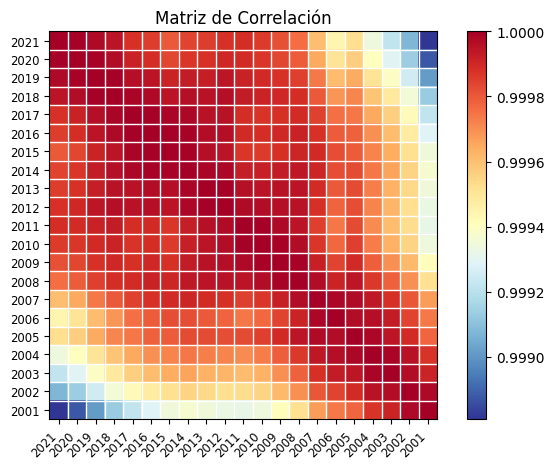

In [80]:
corr = Poblacion_provincias.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns),title='Matriz de Correlación')
plt.show()


### Veamos una grafica con la poblacion de Sevilla en los ultimos 20 años

In [81]:
Sevilla = Poblacion_provincias.iloc[40].sort_index(ascending=True)

fig = px.line(Sevilla,
              x=Sevilla.index,
              y=Sevilla.values,
              markers=True,
              title='Población Sevilla 2001-2021')
fig.update_xaxes(title='Año')
fig.update_yaxes(title='Población')
fig.show()

### Veamos ejemplo de otras grandes ciudades de España

In [82]:
Madrid = Poblacion_provincias.iloc[26].sort_index(ascending=True)
fig1 = px.line(Madrid,
               x=Madrid.index,
               y=Madrid.values,
               markers=True,
               title='Población Madrid 2001-2021')
fig1.update_xaxes(title='Año')
fig1.update_yaxes(title='Población')

fig1.show()

In [83]:
Malaga = Poblacion_provincias.iloc[27].sort_index(ascending=True)
fig2 = px.line(Malaga,
               x=Malaga.index,
               y=Malaga.values,
               markers=True,
               title='Población Málaga 2001-2021')
fig2.update_xaxes(title='Año')
fig2.update_yaxes(title='Población')
fig2.show()

### Sevilla tiene una gran bajada de población sobre todo a partir del año 2002, veamos que pasó

### Veamos un grafico con la emigracion de Sevilla capital a resto de Sevilla

In [84]:
emig_sev_2001_2021 = pd.read_csv('data/Emigraciones_Sevilla_capital_resto_Sevilla_2001_2021.csv',sep=';')
emig_sev_2001_2021.drop(['Medida','Unnamed: 5','Lugar de destino','Lugar de origen'],axis=1,inplace=True)

In [85]:
fig3 = px.bar(emig_sev_2001_2021,
               x='Anual',
               y='Valor',
               title='Emigraciones Sevilla capital a resto de Sevilla 2001-2021',
               text_auto='.2s')
fig3.update_xaxes(title='Año')
fig3.update_yaxes(title='Población')
fig3.show()

### Escojamos los pueblos alrededor de Sevilla, en concreto a 35km a la redonda y mas de 20 mil habitantes

In [86]:
distancias_Andalucia = pd.read_csv('data/Datos_Provincias_Andalucia.csv')

In [87]:
distancia_sevilla = distancias_Andalucia[distancias_Andalucia['Distancia a la capital (Km). 2019']<35]
distancia_sevilla = distancia_sevilla[distancia_sevilla['Provincia']=='Sevilla']
distancia_sevilla = distancia_sevilla[distancia_sevilla['Población total. 2021']>20000]
distancia_sevilla

,Provincia,CodMun,Municipio,Extensión superficial (Km2). 2019,Perímetro (m). 2019,Altitud sobre el nivel del mar (m). 2019,Coordenadas del núcleo principal (grados). 2022,Número de núcleos que componen el municipio. 2021,Distancia a la capital (Km). 2019,Población total. 2021,...,IBI de naturaleza rústica. Número titulares catastrales. 2020,Número de parcelas catastrales: Solares. 2020,Número de parcelas catastrales: Parcelas edificadas. 2020,Situaciones de alta en actividades empresariales. 2019,Situaciones de alta en actividades profesionales. 2019,Situaciones de alta en actividades artísticas. 2019,Bienes muebles. 2021,Bienes inmuebles. 2021,Bienes inmateriales. 2021,Url. 2021
682,Sevilla,41004,Alcalá de Guadaíra,284.82,104391.07,37,"37.334, -5.849",18,16.1,75546,...,2035,2696,18257,8052,976,49,10,292,0,https://guiadigital.iaph.es/municipio/6058/alc...
694,Sevilla,41017,Bormujos,12.27,19575.72,101,"37.371, -6.07",1,8.4,22390,...,546,360,5960,2319,568,27,0,19,0,https://guiadigital.iaph.es/municipio/6071/bor...
697,Sevilla,41021,Camas,11.66,16944.49,8,"37.4, -6.033",1,4.6,27490,...,254,428,5420,2300,404,23,11,9,0,https://guiadigital.iaph.es/municipio/6075/camas
700,Sevilla,41024,Carmona,923.62,158148.09,234,"37.472, -5.638",37,34.5,29123,...,4916,1147,13019,3087,362,14,144,594,9,https://guiadigital.iaph.es/municipio/6079/car...
709,Sevilla,41034,Coria del Río,62.06,42613.49,7,"37.286, -6.053",2,14.4,30774,...,998,525,8782,2446,330,24,48,36,1,https://guiadigital.iaph.es/municipio/6089/cor...
711,Sevilla,41038,Dos Hermanas,160.48,73055.40,41,"37.286, -5.928",4,14.4,136250,...,1538,1833,23758,11494,2057,93,77,188,1,https://guiadigital.iaph.es/municipio/6094/dos...
743,Sevilla,41081,La Rinconada,138.84,66005.89,11,"37.488, -5.979",14,11.9,39204,...,978,1375,10692,3966,420,22,2,27,0,https://guiadigital.iaph.es/municipio/6138/rin...
753,Sevilla,41069,Los Palacios y Villafranca,109.56,44949.18,6,"37.158, -5.924",4,27.9,38678,...,6249,876,12389,3105,332,13,36,16,6,https://guiadigital.iaph.es/municipio/6126/pal...
754,Sevilla,41058,Mairena del Alcor,70.67,38079.74,126,"37.373, -5.748",12,22.9,23893,...,1223,946,8024,2088,288,10,6,66,6,https://guiadigital.iaph.es/municipio/6115/mai...
755,Sevilla,41059,Mairena del Aljarafe,17.74,27841.41,65,"37.345, -6.065",1,9.2,46895,...,318,500,8603,4895,1312,69,0,11,0,https://guiadigital.iaph.es/municipio/6116/mai...


### Ahora con la inmigracion de algunos de estos pueblos desde Sevilla capital 2001-2021

In [88]:
inmig_pueb_sev = pd.read_csv('data/Inmigraciones_pueblos_desde_sevilla_capital_2001_2021.csv',sep=';')

In [89]:
inmig_pueb_sev.drop(['Lugar de origen','Medida','Unnamed: 5'],axis=1,inplace=True)

In [90]:
fig4 = px.line(inmig_pueb_sev,x='Lugar de destino',
               y='Valor',
               color='Anual',
               markers=True,
               title='Inmigraciones pueblos desde Sevilla capital 2001-2021')
fig4.update_yaxes(title='Población')
fig4.show()

### Teniendo claro donde han emigrado cierto numero de personas de Sevilla capital,
### voy a intentar demostrar que algunas de las razones es por el precio de las viviendas.

In [91]:
precio_sevilla = pd.read_csv('data/Precio_viv_sevilla.csv',sep='\t')
precio_sevilla['Precio m2'] = precio_sevilla['Precio m2'].replace(re.compile(r'(.€.m2)'),'')
precio_sevilla['Año'] = precio_sevilla['Año'].replace(re.compile(r'[a-zA-Z]'),'')
precio_sevilla_med = precio_sevilla.groupby('Año')['Precio m2'].median()

In [92]:
fig5 = px.bar(precio_sevilla_med,
              x=precio_sevilla_med.index,
              y=precio_sevilla_med.values,
              title='Precio en euros por m2 en Sevilla 2008-2022',
              text_auto='.4s')
fig5.update_xaxes(title='Año')
fig5.update_yaxes(title='Euro/m2')
fig5.show()

### Sabiendo el precio por m2 de Sevilla ahora veamos el de algunos pueblos mas grandes

### Alcalá de Guadaíra

In [93]:
precio_alcala = pd.read_csv('data/Precio_viv_Alcala_Gra.csv',sep='\t')
precio_alcala['Precio m2'] = precio_alcala['Precio m2'].replace(re.compile(r'(.€.m2)'),'')
precio_alcala['Año'] = precio_alcala['Año'].replace(re.compile(r'[a-zA-Z]'),'')
precio_alcala_med = precio_alcala.groupby('Año')['Precio m2'].median()

In [94]:
fig6 = px.bar(precio_alcala_med,
              x=precio_alcala_med.index,
              y=precio_alcala_med.values,
              title='Precio medio en euros por m2 en Alcalá de Gra. 2009-2022',
              text_auto='.4s')
fig6.update_xaxes(title='Año')
fig6.update_yaxes(title='Euro/m2')
fig6.show()

### Dos Hermanas

In [95]:
precio_dos_herm = pd.read_csv('data/Precio_viv_Dos_Hermanas.csv',sep='\t')
precio_dos_herm['Precio m2'] = precio_dos_herm['Precio m2'].replace(re.compile(r'(.€.m2)'),'')
precio_dos_herm['Año'] = precio_dos_herm['Año'].replace(re.compile(r'[a-zA-Z]'),'')
precio_dos_herm_med = precio_dos_herm.groupby('Año')['Precio m2'].median()

In [96]:
fig7 = px.bar(precio_dos_herm_med,
              x=precio_dos_herm_med.index,
              y=precio_dos_herm_med.values,
              title='Precio medio en euros por m2 en Dos Hermanas 2009-2022',
              text_auto='.4s')
fig7.update_xaxes(title='Año')
fig7.update_yaxes(title='Euro/m2')
fig7.show()

#                                                             Fin